In [1]:
import time
import torch
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import deepwave
%matplotlib inline

import sys
sys.path.append("../")

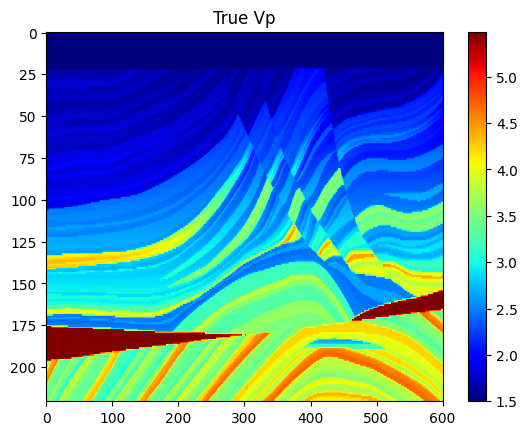

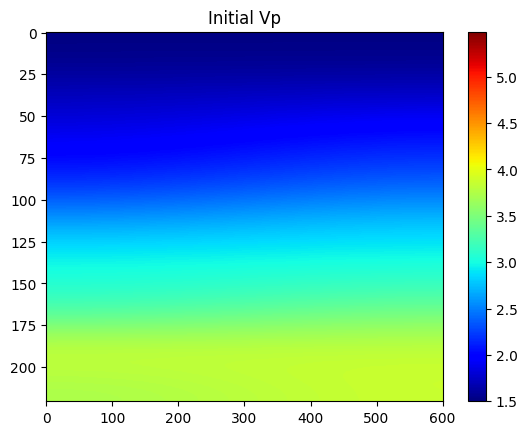

In [14]:
device=torch.device('cuda')

# Medium dimensions
nx=601
dx=0.015
nz=221
dz=0.015

# Sources
n_sources_per_shot=1
n_shots=30
d_source=0.3/dx
first_source=0
source_depth=0

# Receivers
n_receivers_per_shot=125
d_receiver=0.06/dx
first_receiver=0
receiver_depth=0

# Recording time
nt=4000
dt=0.001
ot=0
freq=15
peak_time=1/freq
fs=1/dt

# Source_locations
source_locations=torch.zeros(n_shots, n_sources_per_shot, 2,
                               dtype=torch.long, device=device)
source_locations[..., 1]=source_depth
source_locations[:, 0, 0]=(torch.arange(n_shots) * d_source +
                             first_source)

# Receiver_locations
receiver_locations=torch.zeros(n_shots, n_receivers_per_shot, 2,
                                 dtype=torch.long, device=device)
receiver_locations[..., 1]=receiver_depth
receiver_locations[:, :, 0]=(
    (torch.arange(n_receivers_per_shot) * d_receiver +
     first_receiver)
    .repeat(n_shots, 1)
)

# Source_amplitudes
source_amplitudes=(
    (deepwave.wavelets.ricker(freq, nt, dt, peak_time))
    .repeat(n_shots, n_sources_per_shot, 1).to(device)
)

# Load the true model
v_true=torch.from_numpy(np.fromfile('marmousi.bin', np.float32).reshape(nz, nx)).T.to(device)
m_vmin, m_vmax=np.percentile(v_true.cpu().numpy(), [2,98]) 

plt.figure()
plt.imshow(v_true.T.cpu().numpy(), vmin=m_vmin, vmax=m_vmax, cmap='jet', aspect='auto')
plt.colorbar()
plt.title('True Vp');

# Create initial velocity model
v_init=(torch.tensor(1/gaussian_filter(1/v_true.detach().cpu().numpy(),[300,15])).to(device))
v=v_init.clone().requires_grad_(True)

plt.figure()
plt.imshow(v_init.T.cpu().numpy(), vmin=m_vmin, vmax=m_vmax, cmap='jet', aspect='auto')
plt.colorbar()
plt.title('Initial Vp');

In [ ]:
######################## TO-DO ########################

# Generate data

# Setup optimiser to perform inversion

# Run optimisation/inversion

    # Perform computation per batch
    
    # Plotting every certain iterations 

# Plot convergence 